In [1]:
# Importing relevant libraries
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
from tabulate import tabulate

from scipy import optimize
from scipy.optimize import minimize_scalar

import statsmodels.api as sm

np.random.seed(23)  # fix the seed at the beginning and only once.

import quantecon as qe

# PS0 Question 5. Consumer Maximization Problem

In [2]:
# Parameters values

class PS0Q5parameters(object):
    def __init__(self,alpha,y,p1,p2):
        self.alpha = alpha
        self.y = y
        self.p1 = p1
        self.p2 = p2
        
p = PS0Q5parameters(0.5,10,1,2)


# Define utility function
def utility_function(x1):
    x2 = (p.y-p.p1*x1)/p.p2 # Income not spent first good is spent on the second
    utility = x1**p.alpha * x2**(1-p.alpha)
    return -utility

# Maximization to minimization
# obj_func = lambda x1: -utility_function(x1,alpha,y,p1,p2)

res = minimize_scalar(utility_function, bounds = (0,p.y/p.p1))
maximum = -res.fun
x1_star = res.x
x2_star = (p.y-p.p1*x1_star)/p.p2

print(f'The consumer would buy {x1_star} units of x1 and {x2_star} units of x2. Utility is maximized at {maximum}.')

The consumer would buy 5.000000000088435 units of x1 and 2.4999999999557825 units of x2. Utility is maximized at 3.5355339059327378.


# PS1 Question 3. For Loop

In [3]:
for n in range(10):
    print(f'Current number: {n+1}, Previous number: {n}, Sum: {n+1 + n}')

Current number: 1, Previous number: 0, Sum: 1
Current number: 2, Previous number: 1, Sum: 3
Current number: 3, Previous number: 2, Sum: 5
Current number: 4, Previous number: 3, Sum: 7
Current number: 5, Previous number: 4, Sum: 9
Current number: 6, Previous number: 5, Sum: 11
Current number: 7, Previous number: 6, Sum: 13
Current number: 8, Previous number: 7, Sum: 15
Current number: 9, Previous number: 8, Sum: 17
Current number: 10, Previous number: 9, Sum: 19


# PS1 Question 5. CES Production Function and Comparative Statistics

The production function takes Cobb-Douglas form.


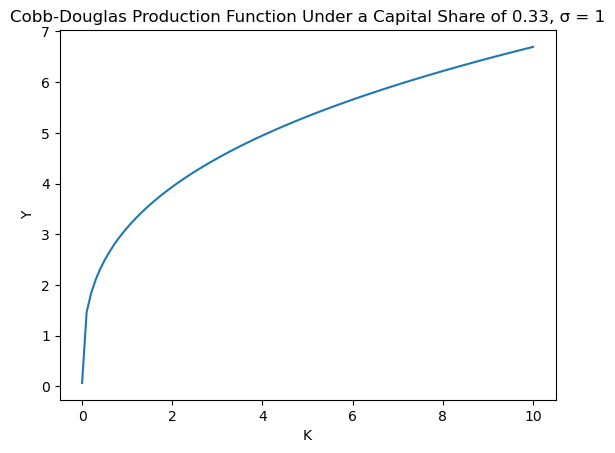

The production function takes Cobb-Douglas form.
The production function takes Cobb-Douglas form.
The production function takes Cobb-Douglas form.


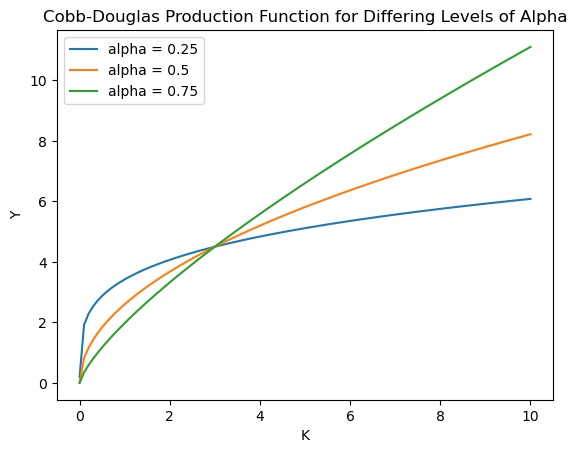

The production function takes CES form.


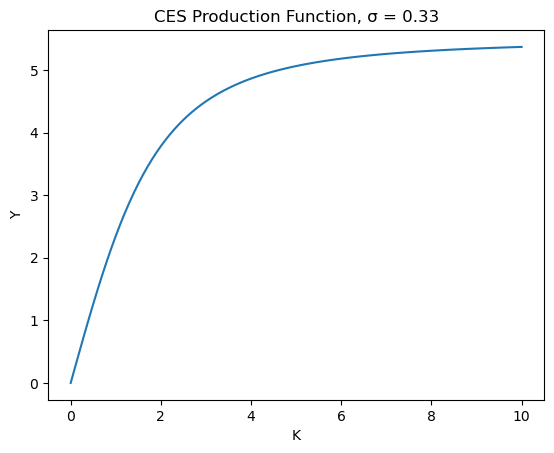

The production function takes CES form.
The production function takes CES form.
The production function takes Cobb-Douglas form.
The production function takes CES form.
The production function takes CES form.


/var/folders/cm/9rphlv_j6nxghv7p6grn_96w0000gn/T/ipykernel_20986/89843887.py:23: RuntimeWarning: invalid value encountered in reciprocal
  Y = A * (alpha * K**((sigma-1)/sigma) + (1-alpha) * L**((sigma-1)/sigma))**(sigma/(sigma-1))


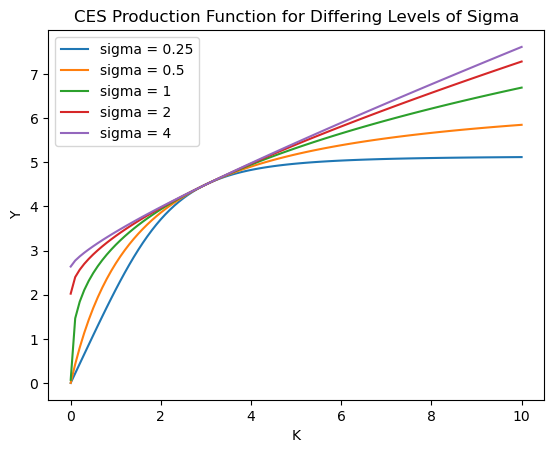

In [4]:
# Parameters class
class PS1Q5parameters(object):
    def __init__(self,A,alpha,sigma,L):
        self.A = A
        self.alpha = alpha
        self.sigma = sigma
        self.L = L
    
    def change_alpha(self,alpha):
        self.alpha = alpha
    
    def change_sigma(self,sigma):
        self.sigma = sigma
        

# Production function
def production(K,L,A,alpha,sigma):
    if sigma == 1:
        print('The production function takes Cobb-Douglas form.')
        Y = A * K**alpha * L**(1-alpha)
    else:
        print('The production function takes CES form.')
        Y = A * (alpha * K**((sigma-1)/sigma) + (1-alpha) * L**((sigma-1)/sigma))**(sigma/(sigma-1))
    return Y
    

# Defining initial parameters and grid
p = PS1Q5parameters(1.5,0.33,1,3)
kgrid = np.linspace(1e-5,10,101)


# Cobb-Douglas Production Function

# Plot
fig, ax = plt.subplots()
plt.plot(kgrid, production(kgrid,p.L,p.A,p.alpha,p.sigma))
plt.xlabel('K')
plt.ylabel('Y')
plt.title(f'Cobb-Douglas Production Function Under a Capital Share of {p.alpha}, σ = {p.sigma}')
plt.show()

# Changing parameter values for alpha
def production_diff_alpha():
    alpha_values = [0.25,0.5,0.75]

    fig, ax = plt.subplots()
    for alpha in alpha_values:
        p.change_alpha(alpha)
        ax.plot(kgrid, production(kgrid,p.L,p.A,p.alpha,p.sigma),label=f'alpha = {alpha}')
    plt.legend()
    plt.xlabel('K')
    plt.ylabel('Y')
    plt.title(f'Cobb-Douglas Production Function for Differing Levels of Alpha')
    plt.show()
    
production_diff_alpha()


# CES Production Function

# Changing parameters
p.change_alpha(0.33)
p.change_sigma(0.33)

# Plot
fig, ax = plt.subplots()
plt.plot(kgrid, production(kgrid,p.L,p.A,p.alpha,p.sigma))
plt.xlabel('K')
plt.ylabel('Y')
plt.title(f'CES Production Function, σ = {p.sigma}')
plt.show()

# Changing parameter values for sigma
def production_diff_sigma():
    sigma_values = [0.25,0.5,1,2,4]

    fig, ax = plt.subplots()
    for sigma in sigma_values:
        p.change_sigma(sigma)
        ax.plot(kgrid, production(kgrid,p.L,p.A,p.alpha,p.sigma),label=f'sigma = {sigma}')
    plt.legend()
    plt.xlabel('K')
    plt.ylabel('Y')
    plt.title(f'CES Production Function for Differing Levels of Sigma')
    plt.show()
    
production_diff_sigma()

# PS4 Question 1. Rosenbrock Function in n Dimensions

In [5]:
def rosenbrock_N(X):
    N = len(X)
    rosenbrock = 0
    if len(X) < 2: # Ensuring the Rosenbrock function has at least 2 dimensions
        raise ValueError("The Rosenbrock function requires at least two variables.")
    else:
        for n in range(N-1):
            rosenbrock += (1-X[n])**2+(X[n+1]-X[n]**2)**2
    return rosenbrock

print('''
Comment: The algorithm that performs the best is the BFGS method. Note that this minimization problem takes 
a function that is continuous, differentiable and with a unique global minimum. Consequently, 
derivative-based local optimization methods as the BFGS method perform better especially when the number of
dimensions is large. For other optimization problems, rugged functions with multiple minima, 
discountinuities, no derivatives, etc. Powell, Nelder-Mead and Brute-Force might work better.
''')

print('''
Based on the computation times for N=30 and N=100, the BFGS method appears to be the fastest and most efficient 
optimization algorithm for the Rosenbrock function with a large number of variables. The BFGS method is a 
quasi-Newton method that uses approximations of the Hessian matrix to update the search direction and step size. 

The Powell method is the most accurate, but it is the slowest method. The Powell method is likely the most 
accurate because it uses both derivative based methods and search methods; we could have included a range into the 
algorithm, but we were able to find the answer without. 

The Nelder-Mead method should not be used for minimizing the Rosenbrock function for dimensions over N=6, as it 
gives extremely inaccurate answers. This is because it is based on a simplex direct search method, so it does not 
evaluate all of the points. As such, the Nelder-Mead method is a local optimization method that may not ensure that the global minimum is 
found.
       
The Rosenbrock function is a continuous and smooth function, so it is best to use derivative based methods such as
the BFGS method or the Powell method, as they will be the most accurate and quick if we know the general bounds of 
where the solution lies. The Rosenbrock function is a non-convex, multimodal function that can be difficult to 
optimize due to its narrow valleys and numerous local minima. However, the BFGS method is able to navigate these 
challenges by adapting the search direction and step size based on the local gradient and curvature of the 
objective function. This can allow the algorithm to converge to the global minimum more quickly and with fewer 
function evaluations than other methods such as the Nelder-Mead or Powell methods.
    
Therefore, for high-dimensional problems such as N=30 or N=100, the BFGS method may be a more suitable choice for 
optimizing the Rosenbrock function, especially when the goal is to find the global minimum in a reasonable amount 
of time.
''')


Comment: The algorithm that performs the best is the BFGS method. Note that this minimization problem takes 
a function that is continuous, differentiable and with a unique global minimum. Consequently, 
derivative-based local optimization methods as the BFGS method perform better especially when the number of
dimensions is large. For other optimization problems, rugged functions with multiple minima, 
discountinuities, no derivatives, etc. Powell, Nelder-Mead and Brute-Force might work better.


Based on the computation times for N=30 and N=100, the BFGS method appears to be the fastest and most efficient 
optimization algorithm for the Rosenbrock function with a large number of variables. The BFGS method is a 
quasi-Newton method that uses approximations of the Hessian matrix to update the search direction and step size. 

The Powell method is the most accurate, but it is the slowest method. The Powell method is likely the most 
accurate because it uses both derivative based methods

# PS4 Question 2. Steady States and Transitions in a Solow Economy

The values of the saving rate and TFP that make steady state output per worker equal to 10 and the capital-output ratio equal to 4 are
s = 0.4
A = 3.307
Under the steady state, capital per worker and ouptut per worker are
k = 40.000
y = 10.000
After the shock, the new steady state capital per worker and ouptut per worker are
k = 107.672
y = 26.918
With epsilon=0.5, it takes 70 periods to converge to the new steady state.


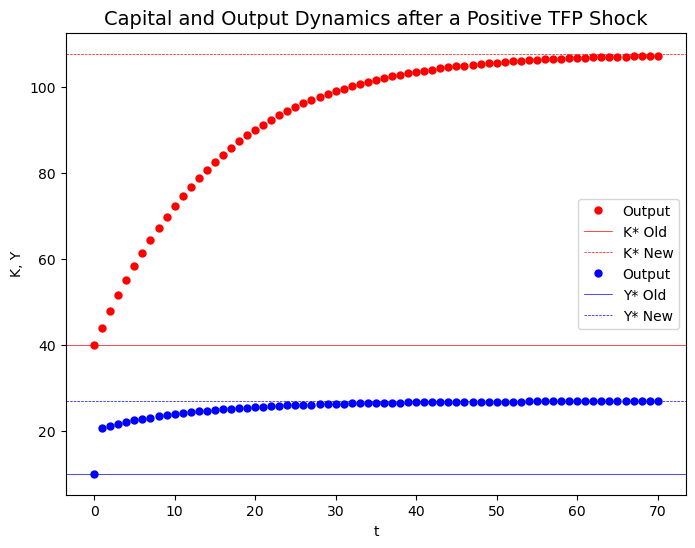

In [6]:
# a)

# Defining parameter values

class PS4Q2parameters(object):
    def __init__(self,alpha,delta):
        self.alpha = alpha
        self.delta = delta
        
p = PS4Q2parameters(0.3,0.1)
params = [p.alpha,p.delta]

# Define the system of non-linear equations; this system of equations consists of solving 2 non-linear equations for 2 unknowns
def steady_state_a(X, params):
    
    s, A = X
    alpha, delta = params
    
    k = (s*A/delta)**(1/(1-alpha)) # defining k*
    y = A*k**alpha # defining y*
    
    # From the calibration, we know these equations need to be equal to 0
    eq_1 = y - 10
    eq_2 = k/y - 4    
    
    return  np.array([eq_1, eq_2]) # (2,) vector of the values of eq_1 and e1_2

# Solve the system using fsolve
x0 = [0.25,0.25] # initial value; note that s must take a value between 0,1 and A needs to be positive
roots = optimize.fsolve(steady_state_a, x0, args=params)

s_star, A_star = roots # saving s and A values
print('The values of the saving rate and TFP that make steady state output per worker equal to 10 and the capital-output ratio equal to 4 are')
print('s =', round(s_star,3))
print('A =', round(A_star,3))

print('Under the steady state, capital per worker and ouptut per worker are')
k_star = (s_star*A_star/p.delta)**(1/(1-p.alpha))
y_star = A_star*k_star**(p.alpha)
print('k =',"%.3f" % k_star)
print('y =',"%.3f" % y_star)


# c) Transition to new steady state after TFP shock

A_new = 2*A_star

print('After the shock, the new steady state capital per worker and ouptut per worker are')
k_star_new = (s_star*A_new/p.delta)**(1/(1-p.alpha))
y_star_new = A_new*k_star_new**(p.alpha)
print('k =',"%.3f" % k_star_new)
print('y =',"%.3f" % y_star_new)


t = 0

k_t = k_star
y_t = y_star

capital_path = [k_star]
output_path = [y_star]

epsilon = 0.5 # We opted to use an epsilon value of 0.001 rather than 0.5; this means that the number of periods
                # of convergence will be greater.

# While loop to model dynamics of economy approaching new steady state
while np.abs(k_t - k_star_new) >= epsilon: # k_1 is the steady state k in b)
    
    k_new = s_star*A_new*k_t**p.alpha + (1-p.delta)*k_t # law of motion of capital per worker
    y_new = A_new*k_new**(p.alpha)
    
    capital_path.append(k_new)
    output_path.append(y_new)
    
    k_t = np.copy(k_new)
    
    t += 1

    if t > 1000:
        break
        
print(f'With epsilon=0.5, it takes {t} periods to converge to the new steady state.')

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(0,t+1), capital_path, linewidth=2.0, color='r',linestyle='None', marker='.', markersize = 10.0,label='Output')
ax.axhline(k_star, color='r', linestyle="solid", linewidth=0.5, label = "K* Old") # Plotting steady state of output per worker after shock
ax.axhline(k_star_new, color='r', linestyle="dashed", linewidth=0.5, label = "K* New") # Plotting steady state of output per worker after shock

ax.plot(range(0,t+1), output_path, linewidth=2.0, color='b',linestyle='None', marker='.', markersize = 10.0,label='Output')
ax.axhline(y_star, color='b', linestyle="solid", linewidth=0.5, label = "Y* Old") # Plotting steady state of capital per worker after shock
ax.axhline(y_star_new, color='b', linestyle="dashed", linewidth=0.5, label = "Y* New") # Plotting steady state of capital per worker after shock

ax.set_xlabel('t')
ax.set_ylabel('K, Y')
ax.legend()
ax.set_title('Capital and Output Dynamics after a Positive TFP Shock', fontsize=14)

plt.show()

# PS4 Question 3. Optimal Life-Cycle Consumption Paths

a) Two-period model
c0*= 7.551
c1*= 7.551
a1*= 2.449
Utility is maximized at -1.427.

b) Four-period model
Consumption path: [7.547425199222994, 7.546234306914819, 7.5465581689911945, 7.547202620438747]
Utility is maximized at -2.742.

c) Comparative statics
Optimal path for r=0.01: [7.74416436 7.58518508 7.43175313 7.27996675]
Optimal path for r=0.04: [7.55727256 7.54819585 7.54096316 7.53268584]
Optimal path for r=0.08: [7.32682803 7.5050347  7.68820802 7.87572967]

d) Optimal Consumption Paths under Income Risk, Two-Period Model


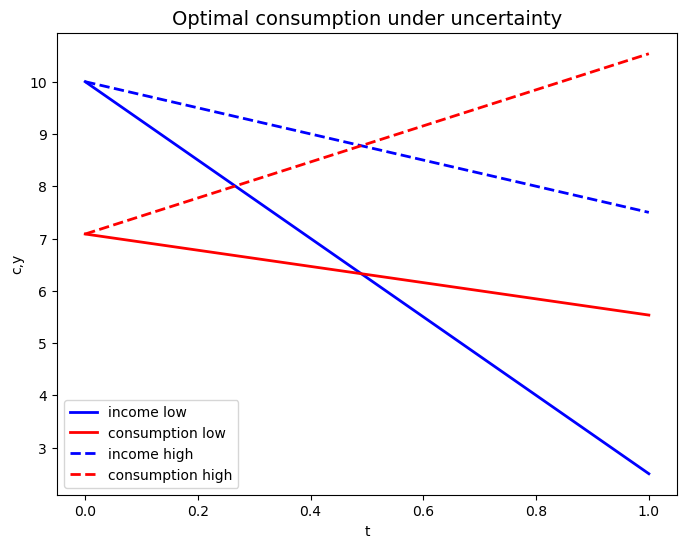

Exercise d) is analogous to a) but with uncertainty.
The optimal savings under certainty (3a) were a1*= 2.449
The optimal savings under uncertainty (3d) are a1*= 2.914
Thus, risk increased savings by 18.993%. Since now the world is risky, the individual wants to save a little bit more today in case tomorrow she suffers the bad income shock, he/she can cope with the shock with the extra-savings. These savings that are motivated to cope with risk are referred as precautionary savings in the economics literature.


In [7]:
print('a) Two-period model')

# Defining parameter values

class PS4Q3parameters(object):
    def __init__(self,beta,a0,y):
        self.beta = beta
        self.r = 1/beta - 1
        self.a0 = a0
        self.y = y
        
    def change_y(self,y):
        self.y = y

    def change_r(self,r):
        self.r = r
        
p = PS4Q3parameters(0.96,0,[10,5])

# Defining utility functions

def utility_CRRA(c, theta=1.5): # CRRA per-period utility function
    if c < 1e-5:
        return np.infty
    elif theta == 1:
        return np.log(c)
    else:
        return (c**(1-theta))/(1-theta)

params = [p.beta, p.r, p.a0, p.y]

def U(c0,params): # Lifetime utility: the function to minimize
    beta, r, a0, y = params
    c1 = (1+r)*(a0+y[0]-c0)+y[1]  # Rewriting the problem in terms of unconstrained maximization for 1 variable
    return -(utility_CRRA(c0)+beta*utility_CRRA(c1))  # turn maximization problem into minimization problem

# Solving maximization problem

x0 = p.y[0] # Setting initial guess
res = optimize.minimize(U, x0, method='BFGS', args=params)  

c0_star = res.x
c1_star = (1+p.r)*(p.a0+p.y[0]-c0_star)+p.y[1]
c_star = [c0_star,c1_star]
print('c0*=',"%.3f" % c0_star)
print('c1*=',"%.3f" % c1_star)

a1_star_a = p.a0+p.y[0]-c0_star
print('a1*=',"%.3f" % a1_star_a)
a_star = [p.a0,a1_star_a]

utility_star = -res.fun
print(f'Utility is maximized at {round(utility_star,3)}.')


print('')
print('b) Four-period model')

#  c0 +a(1) = a_0 +y0
#  c1 +a(2) = (1+r)a_1 +y1
#  c2 +a(3) = (1+r)a_2 +y2
#  c4  = (1+r)a_3 +y3

p.change_y([5, 10, 15, 0])
params = [p.beta, p.r, p.a0, p.y]

# Lifetime Utility
def U_t4(C, params):
    
    beta, r, a0, y = params  
    c0, c1, c2 = C
    
    a1 = a0 + y[0] - c0 # Rewrite the problem in terms of unconstrained maximization for 3 variables
    a2 = (1+r)*a1 + y[1] - c1
    a3 = (1+r)*a2 + y[2] - c2 # Note recursive structure
    
    c3 = (1+r)*a3 + y[3]
    
    return -(utility_CRRA(c0) + beta*utility_CRRA(c1) +beta**2*utility_CRRA(c2) +beta**3*utility_CRRA(c3))

x0 = [8,8,8] # educated initial guess (ie close to average income per period)
res = optimize.minimize(U_t4, x0, method='BFGS', args=params)

c0_star, c1_star, c2_star = res.x

a1 = p.a0 +p.y[0] - c0_star
a2 = (1+p.r)*a1 + p.y[1] - c1_star
a3 = (1+p.r)*a2 + p.y[2] - c2_star

c3_star = (1+p.r)*a3 + p.y[3]

c_star = [c0_star,c1_star,c2_star,c3_star]
a_star = [a1,a2,a3,0]

print(f'Consumption path: {c_star}')

print(f'Utility is maximized at {round(-res.fun,3)}.')


print('')
print('c) Comparative statics')

c_vectors = []
a_vectors = []

r_list = [0.01, 0.04, 0.08]
for r in r_list:
    
    p.change_r(r)    
    params = [p.beta, p.r, p.a0, p.y]

    x0 = [8,8,8]
    
    res = optimize.minimize(U_t4,x0, method='BFGS', args=params)  
    
    c0_star, c1_star, c2_star = res.x

    a1 = p.a0 +p.y[0] - c0_star
    a2 = (1+p.r)*a1 + p.y[1] - c1_star
    a3 = (1+p.r)*a2 + p.y[2] - c2_star

    c3_star = (1+p.r)*a3 + p.y[3]

    c_star = [c0_star,c1_star,c2_star,c3_star]
    a_star = [a1,a2,a3,0]
    
    c_vectors.append(c_star)
    a_vectors.append(a_star)
    
c_vectors = np.array(c_vectors)
print(f'Optimal path for r=0.01: {c_vectors[0]}')
print(f'Optimal path for r=0.04: {c_vectors[1]}')
print(f'Optimal path for r=0.08: {c_vectors[2]}')


print('')
print('d) Optimal Consumption Paths under Income Risk, Two-Period Model')

p.change_r(1/p.beta - 1)
p.change_y(10) # y0

y1_probability = [0.5,0.5]
y1_values = [2.5, 7.5]

params = [p.beta, p.r, p.a0, p.y, y1_values, y1_probability]

def U_uncertain(c0,params):
    beta, r, a0, y0, y1, y1_probability = params
    
    c1_1 = (1+r)*(a0+y0-c0)+y1[0]  # Two possible consumptions
    c1_2 = (1+r)*(a0+y0-c0)+y1[1]
    
    return -(utility_CRRA(c0) + beta*((y1_probability[0]*utility_CRRA(c1_1))+(y1_probability[1]*utility_CRRA(c1_2))))

x0 = p.y # x0 = y0
res = optimize.minimize(U_uncertain, x0, method='BFGS', args=params)  

c0_star = res.x
c11_star = (1+p.r)*(p.a0+p.y-c0_star)+y1_values[0]
c12_star = (1+p.r)*(p.a0+p.y-c0_star)+y1_values[1]

c_star_l = [c0_star,c11_star]
c_star_h = [c0_star,c12_star]

a1 = p.a0+p.y-c0_star
a_star = [p.a0,a1]


# Plotting consumption paths

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(range(2), [p.y, y1_values[0]], linewidth=2.0, color='b',label='income low')
ax.plot(range(2), c_star_l, linewidth=2.0, color='r',label='consumption low')
ax.plot(range(2), [p.y, y1_values[1]], linewidth=2.0, color='b', linestyle='dashed',label='income high')
ax.plot(range(2), c_star_h, linewidth=2.0, color='r',linestyle='dashed',label='consumption high')

ax.legend()
ax.set_xlabel('t')
ax.set_ylabel('c,y')
ax.set_title('Optimal consumption under uncertainty', fontsize=14)
plt.show()

print('Exercise d) is analogous to a) but with uncertainty.')
print(f'The optimal savings under certainty (3a) were a1*= {round(a1_star_a[0],3)}')
print(f'The optimal savings under uncertainty (3d) are a1*= {round(a1[0],3)}')

growth_a = (a1-a1_star_a)/a1_star_a*100
print(f'Thus, risk increased savings by {round(growth_a[0],3)}%. Since now the world is risky, the individual wants to save a little bit more today in case tomorrow she suffers the bad income shock, he/she can cope with the shock with the extra-savings. These savings that are motivated to cope with risk are referred as precautionary savings in the economics literature.')